Para este trabalho, foi utilizado o dataset [Mall Custumers](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

Este dataset possui 200 entradas, cada uma contendo informação de clientes do shopping. as informações são:


 0   CustomerID              id único identificador

 1   Gender                  gênero do cliente

 2   Age                     idade

 3   Annual Income (k$)      renda anual

 4   Spending Score (1-100)  score de gastos (métrica do shopping)
 

In [1]:
import pandas as pd

df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df_encoded.head() #True = Male, False = Female

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


In [5]:
proporcao = df_encoded['Gender_Male'].value_counts(normalize=True) * 100
proporcao

Gender_Male
False    56.0
True     44.0
Name: proportion, dtype: float64

In [6]:
from sklearn.preprocessing import StandardScaler

#colunas numéricas
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled['Gender'] = df_encoded['Gender_Male'].values

print(X_scaled.columns)

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender'], dtype='object')


In [7]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
df['Cluster'] = dbscan.fit_predict(X_scaled)

print(df['Cluster'].value_counts())

Cluster
0    200
Name: count, dtype: int64


In [8]:
print(type(X_scaled))


<class 'pandas.core.frame.DataFrame'>


eps=0.30000000000000004, minPts=3, Coeficiente de Silhueta: -0.2121
eps=0.30000000000000004, minPts=4, Coeficiente de Silhueta: -0.2636
eps=0.30000000000000004, minPts=5, Coeficiente de Silhueta: -0.1056
eps=0.5000000000000001, minPts=3, Coeficiente de Silhueta: 0.1433
eps=0.5000000000000001, minPts=4, Coeficiente de Silhueta: 0.0563
eps=0.5000000000000001, minPts=5, Coeficiente de Silhueta: -0.0114
eps=0.5000000000000001, minPts=6, Coeficiente de Silhueta: -0.1113
eps=0.5000000000000001, minPts=7, Coeficiente de Silhueta: -0.1510
eps=0.5000000000000001, minPts=8, Coeficiente de Silhueta: -0.1289
eps=0.5000000000000001, minPts=9, Coeficiente de Silhueta: -0.1802
eps=0.7000000000000001, minPts=3, Coeficiente de Silhueta: -0.0215
eps=0.7000000000000001, minPts=4, Coeficiente de Silhueta: -0.0003
eps=0.7000000000000001, minPts=5, Coeficiente de Silhueta: -0.0158
eps=0.7000000000000001, minPts=6, Coeficiente de Silhueta: 0.0376
eps=0.7000000000000001, minPts=7, Coeficiente de Silhueta: 0.0

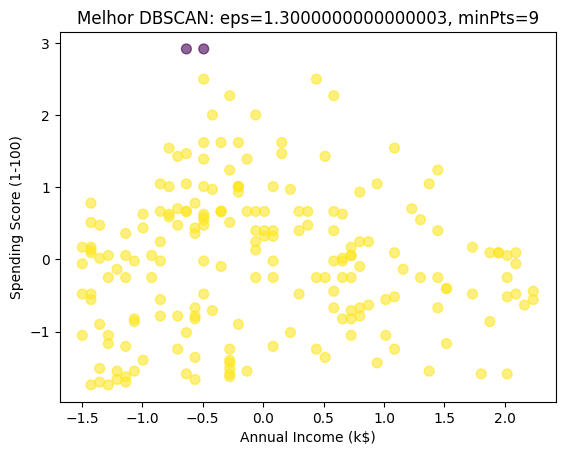

(np.float64(1.3000000000000003),
 9,
 array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1]))

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def cluster_dbscan(X, eps, min_samples):
    return DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X)

def avaliar_clustering(X, labels):
    if len(set(labels)) > 1: 
        score = silhouette_score(X, labels)
        print(f"Coeficiente de Silhueta: {score:.4f}")
    else:
        print("Todos os pontos estão em um único cluster ou marcados como ruído. Silhueta não aplicável.")

def plot_scatter(X, labels, title, xlabel, ylabel):
    plt.scatter(X[:, 0].astype(float), X[:, 1].astype(float), c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def encontrar_melhores_parametros_dbscan(X, eps_values, min_samples_values):
    melhor_eps = None
    melhor_minPts = None
    melhor_silhouette = -1
    melhor_labels = None
    
    for eps in eps_values:
        for minPts in min_samples_values:
            labels = cluster_dbscan(X, eps, minPts)
            
            if len(set(labels)) > 1:
                silhouette_avg = silhouette_score(X, labels)
                print(f"eps={eps}, minPts={minPts}, Coeficiente de Silhueta: {silhouette_avg:.4f}")
                
                if silhouette_avg > melhor_silhouette:
                    melhor_silhouette = silhouette_avg
                    melhor_eps = eps
                    melhor_minPts = minPts
                    melhor_labels = labels
    
    print(f"Melhores parâmetros: eps={melhor_eps}, minPts={melhor_minPts} com Coeficiente de Silhueta {melhor_silhouette:.4f}")
    
    if melhor_labels is not None:
        plot_scatter(X, melhor_labels, f"Melhor DBSCAN: eps={melhor_eps}, minPts={melhor_minPts}",
                     xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)')
    
    return melhor_eps, melhor_minPts, melhor_labels

X_scaled = X_scaled.to_numpy()

eps_values = np.arange(0.1, 3.1, 0.2)  # Testando valores de eps de 0.1 a 3.0
min_samples_values = range(3, 10)  # Testando valores de minPts de 3 a 9

encontrar_melhores_parametros_dbscan(X_scaled, eps_values, min_samples_values)


Dbscan deu tudo errado! Dbscan não conseguiu dividir os clusters de maneira satisfatória, vamos tentar o Kmeans

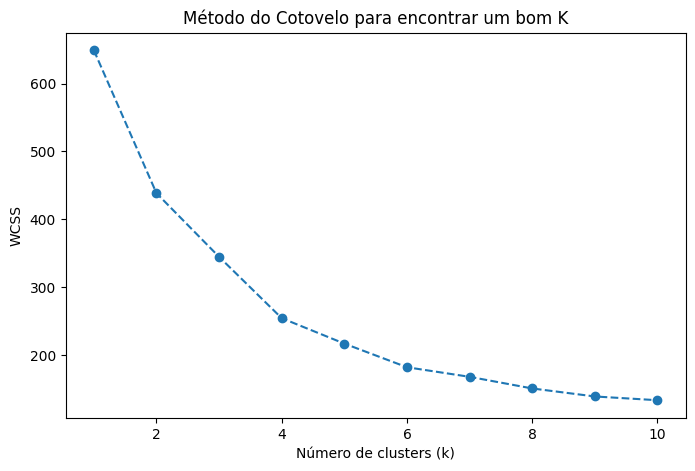

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo para encontrar um bom K')
plt.show()


Usando método do cotovelo, é possível verificar que a partir de k=5 a diminuição se torna menos significativa. Por isso, escolhemos k = 5.

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

print(df['Cluster_KMeans'].value_counts())


Cluster_KMeans
0    58
2    47
1    39
3    34
4    22
Name: count, dtype: int64


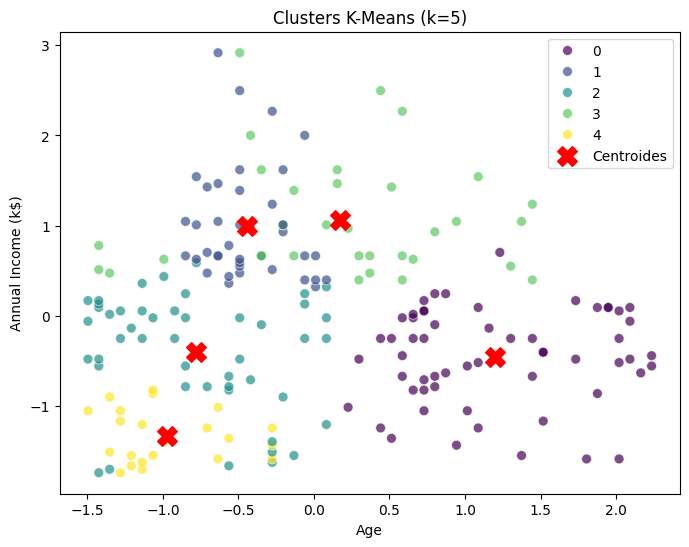

In [12]:
import seaborn as sns

x_col, y_col = X_scaled[:, 0], X_scaled[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_col, y=y_col, hue=df['Cluster_KMeans'], palette="viridis", s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroides')
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Clusters K-Means (k=5)")
plt.legend()
plt.show()